# A Finite Element Examples: Frame 01

This example is based on the frame01 example distributed with FEM.edu

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

Now load the needed components of FEM.edu

In [2]:
from femedu.domain import *
from femedu.solver.NewtonRaphsonSolver import *
from femedu.elements.Frame2D import *
from femedu.materials.ElasticSection import *

## Build a model

In [3]:
# initialize a system model

N  = 16     # number of elements
L  = 100.0
E  = 20000.
EA = 2000000.0
EI = 210000.0
w  = -0.1

params = {'E': E, 'A': EA/E, 'I': EI/E}

model = System()
model.setSolver(NewtonRaphsonSolver())

# create nodes

nd0 = Node(0.0, 0.0)
model += nd0

ndi = nd0
for i in range(N):
    # nodes
    ndj = Node( (i+1)*L/N, 0.0 )
    model += ndj

    # elements
    elem = Frame2D(ndi, ndj, ElasticSection(params))
    elem.setDistLoad(w)
    model += elem

    ndi = ndj

# define support(s)
nd0.fixDOF('ux', 'uy')    # horizontal support left end
ndi.fixDOF('uy')          # vertical support right end



## Load the model and solve

In [4]:
# add loads
# .. load only the upper nodes
Pcr = np.pi**2 * EI / L**2
ndi.setLoad((-0.5*Pcr,), ('ux',))

# show model information
print(model)

model.solve(verbose=True)

model.report()


System object
Node0({'ux': 0, 'uy': 1, 'rz': 2}, x=[0. 0.], u=None)
Node1({'ux': 0, 'uy': 1, 'rz': 2}, x=[6.25 0.  ], u=None)
Node2({'ux': 0, 'uy': 1, 'rz': 2}, x=[12.5  0. ], u=None)
Node3({'ux': 0, 'uy': 1, 'rz': 2}, x=[18.75  0.  ], u=None)
Node4({'ux': 0, 'uy': 1, 'rz': 2}, x=[25.  0.], u=None)
Node5({'ux': 0, 'uy': 1, 'rz': 2}, x=[31.25  0.  ], u=None)
Node6({'ux': 0, 'uy': 1, 'rz': 2}, x=[37.5  0. ], u=None)
Node7({'ux': 0, 'uy': 1, 'rz': 2}, x=[43.75  0.  ], u=None)
Node8({'ux': 0, 'uy': 1, 'rz': 2}, x=[50.  0.], u=None)
Node9({'ux': 0, 'uy': 1, 'rz': 2}, x=[56.25  0.  ], u=None)
Node10({'ux': 0, 'uy': 1, 'rz': 2}, x=[62.5  0. ], u=None)
Node11({'ux': 0, 'uy': 1, 'rz': 2}, x=[68.75  0.  ], u=None)
Node12({'ux': 0, 'uy': 1, 'rz': 2}, x=[75.  0.], u=None)
Node13({'ux': 0, 'uy': 1, 'rz': 2}, x=[81.25  0.  ], u=None)
Node14({'ux': 0, 'uy': 1, 'rz': 2}, x=[87.5  0. ], u=None)
Node15({'ux': 0, 'uy': 1, 'rz': 2}, x=[93.75  0.  ], u=None)
Node16({'ux': 0, 'uy': 1, 'rz': 2}, x=[100.   0.

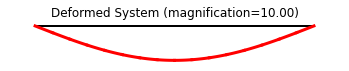

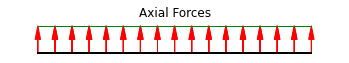

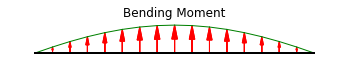

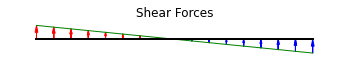

In [5]:
# create plots

model.plot(factor=10.0)

model.beamValuePlot("F")
model.beamValuePlot("M")
model.beamValuePlot("V")

## Stability Analysis